Course Human-Centered Data Science ([HCDS](https://www.mi.fu-berlin.de/en/inf/groups/hcc/teaching/winter_term_2020_21/course_human_centered_data_science.html)) - Winter Term 2020/21 - [HCC](https://www.mi.fu-berlin.de/en/inf/groups/hcc/index.html) | [Freie Universität Berlin](https://www.fu-berlin.de/)
***
# A2 - Reproducibility Workflow


Your assignment is to create a graph that looks a lot like the one below one, starting from scratch, and following best practices for reproducible research.

![wikipedia_pageViews_2008-2020.png](img/wikipedia_pageViews_2008-2020.png)

## Before you start
1. Read all instructions carefully before you begin.
1. Read all API documentation carefully before you begin.
1. Experiment with queries in the sandbox of the technical documentation for each API to familiarize yourself with the schema and the data.
1. Ask questions if you are unsure about anything!
1. When documenting your project, please keep the following questions in your mind:
   * _If I found this GitHub repository, and wanted to fully reproduce the analysis, what information would I want?_
   * _What information would I need?_

## Step 1️⃣: Data acquisition
In order to measure Wikipedia traffic from January 2008 until October 2020, you will need to collect data from two different APIs:

1. The **Legacy Pagecounts API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pagecounts_data_(legacy)/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end)) provides access to desktop and mobile traffic data from December 2007 through July 2016.
1. The **Pageviews API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end)) provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.

For each API, you need to collect data for all months where data is available and then save the raw results into five (3+2) separate `JSON`files (one file per API query type) before continuing to step 2.

To get you started, you can use the following **sample code for API calls**:

In [9]:
# Source: https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb?format=raw

import json
import requests

endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

# LEGACY: until 2016
## parameters for getting aggregated legacy view data 
## see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end

# 1st Jan 2008 until 31th July 2016
## desktop
params_legacy_d = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                # for end use 1st day of month following final month of data
                 "end" : "2016073100"
                    }

## mobile
params_legacy_m = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                # for end use 1st day of month following final month of data
                 "end" : "2016073100"
                    }

# PAGEVIEW: since 2015 
# parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end

# July 2015 until Oct 2020
## desktop
params_pageviews_d = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020100100'
                        }

## mobile web
params_pageviews_mw = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020100100'
                        }

## mobile app
params_pageviews_ma = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020100100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/malina-scheuer',
    'From': 'm.scheuer@campus.tu-berlin.de'
}

def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [21]:
# legacy desktop
legacy_d = api_call(endpoint_legacy, params_legacy_d)
legacy_d

# legacy mobile
legacy_m = api_call(endpoint_legacy, params_legacy_m)
legacy_m

{'items': [{'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '2014100100',
   'count': 3091546685},
  {'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '2014110100',
   'count': 3027489668},
  {'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '2014120100',
   'count': 3278950021},
  {'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '2015010100',
   'count': 3485302091},
  {'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '2015020100',
   'count': 3091534479},
  {'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '2015030100',
   'count': 3330832588},
  {'project': 'en.wikipedia',
   'access-site': 'mobile-site',
   'granularity': 'monthly',
   'timestamp': '

In [37]:
# pageview desktop
pageviews_d = api_call(endpoint_pageviews, params_pageviews_d)
pageviews_d

# pageview mobile web
pageviews_mw = api_call(endpoint_pageviews, params_pageviews_mw)
pageviews_mw

# pageview mobile app
pageviews_ma = api_call(endpoint_pageviews, params_pageviews_ma)
pageviews_ma

{'items': [{'project': 'en.wikipedia',
   'access': 'mobile-app',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015070100',
   'views': 109624146},
  {'project': 'en.wikipedia',
   'access': 'mobile-app',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015080100',
   'views': 109669149},
  {'project': 'en.wikipedia',
   'access': 'mobile-app',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015090100',
   'views': 96221684},
  {'project': 'en.wikipedia',
   'access': 'mobile-app',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015100100',
   'views': 94523777},
  {'project': 'en.wikipedia',
   'access': 'mobile-app',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015110100',
   'views': 94353925},
  {'project': 'en.wikipedia',
   'access': 'mobile-app',
   'agent': 'user',
   'granularity': 'monthly',
   'timestamp': '2015120100',
   'views': 99438956},
  {'project': 'en.wikipedia',
   'a

In [35]:
# save json files

# legacy pagecounts
data = json.dumps(legacy_d)
with open("pagecounts_desktop-2008010100-2016073100.json","w") as f:
  f.write(data)

data = json.dumps(legacy_m)
with open("pagecounts_mobile-2008010100-2016073100.json","w") as f:
  f.write(data)

# pageviews
data = json.dumps(pageviews_d)
with open("pageviews_desktop-2015010100-2020100100.json","w") as f:
  f.write(data)

data = json.dumps(pageviews_mw)
with open("pageviews_mobile-web-2015010100-2020100100.json","w") as f:
  f.write(data)

data = json.dumps(pageviews_ma)
with open("pageviews_mobile-app-2015010100-2020100100.json","w") as f:
  f.write(data)

Your `JSON`-formatted source data file must contain the complete and un-edited output of your API queries. The naming convention for the source data files is: `apiname_accesstype_firstmonth-lastmonth.json`. For example, your filename for monthly page views on desktop should be: `pagecounts_desktop-site_200712-202010.json`

### Important notes❗
1. As much as possible, we're interested in *organic* (user) traffic, as opposed to traffic by web crawlers or spiders. The Pageview API (but not the Pagecount API) allows you to filter by `agent=user`. You should do that.
1. There is about one year of overlapping traffic data between the two APIs. You need to gather, and later graph, data from both APIs for this period of time.

## Step 2: Data processing

You will need to perform a series of processing steps on these data files in order to prepare them for analysis. These steps must be followed exactly in order to prepare the data for analysis. At the end of this step, you will have a single `CSV`-formatted data file `en-wikipedia_traffic_200712-202010.csv` that can be used in your analysis (step 3) with no significant additional processing.

* For data collected from the Pageviews API, combine the monthly values for `mobile-app` and `mobile-web` to create a total mobile traffic count for each month.
* For all data, separate the value of `timestamp` into four-digit year (`YYYY`) and two-digit month (`MM`) and discard values for day and hour (`DDHH`).

Combine all data into a single CSV file with the following headers:

| year | month |pagecount_all_views|pagecount_desktop_views|pagecount_mobile_views|pageview_all_views|pageview_desktop_views|pageview_mobile_views|
|------| ------|-------------------|-----------------------|----------------------|------------------|----------------------|---------------------|
| YYYY | MM    |num_views          |num_views              |num_views             |num_views         |num_views             |num_views            | 

In [49]:
# create panda dataframes

import pandas as pd

# legacy
df_legacy_d = pd.json_normalize(legacy_d, 'items')
df_legacy_m = pd.json_normalize(legacy_m, 'items')

# pageview
df_pageviews_d = pd.json_normalize(pageviews_d, 'items')
df_pageviews_mw = pd.json_normalize(pageviews_mw, 'items')
df_pageviews_ma = pd.json_normalize(pageviews_ma, 'items')

# view dataframes
print(df_legacy_d.head(2))
print(df_legacy_m.head(2))

print(df_pageviews_d.head(2))
print(df_pageviews_mw.head(2))
print(df_pageviews_ma.head(2))

        project   access-site granularity   timestamp       count
0  en.wikipedia  desktop-site     monthly  2008010100  4930902570
1  en.wikipedia  desktop-site     monthly  2008020100  4818393763
        project  access-site granularity   timestamp       count
0  en.wikipedia  mobile-site     monthly  2014100100  3091546685
1  en.wikipedia  mobile-site     monthly  2014110100  3027489668
        project   access agent granularity   timestamp       views
0  en.wikipedia  desktop  user     monthly  2015070100  4376666686
1  en.wikipedia  desktop  user     monthly  2015080100  4332482183
        project      access agent granularity   timestamp       views
0  en.wikipedia  mobile-web  user     monthly  2015070100  3179131148
1  en.wikipedia  mobile-web  user     monthly  2015080100  3192663889
        project      access agent granularity   timestamp      views
0  en.wikipedia  mobile-app  user     monthly  2015070100  109624146
1  en.wikipedia  mobile-app  user     monthly  2015080100 

In [74]:
# Join all datasets into one

# rename 1
df_legacy_d = df_legacy_d.rename(columns={'access-site': 'access', 'count': 'pagecount_desktop_views'})
df_legacy_m = df_legacy_m.rename(columns={'access-site': 'access', 'count': 'pagecount_mobile_views'})


# view dataframes
print(df_legacy_d.head(2))
print(df_legacy_m.head(2))

        project        access granularity   timestamp  pagecount_desktop_views
0  en.wikipedia  desktop-site     monthly  2008010100               4930902570
1  en.wikipedia  desktop-site     monthly  2008020100               4818393763
        project       access granularity   timestamp  pagecount_mobile_views
0  en.wikipedia  mobile-site     monthly  2014100100              3091546685
1  en.wikipedia  mobile-site     monthly  2014110100              3027489668


In [78]:
# rename 2
df_pageviews_d = df_pageviews_d.rename(columns={'access-site': 'access', 'views': 'pageview_desktop_views'})
df_pageviews_mw = df_pageviews_mw.rename(columns={'access-site': 'access', 'views': 'pageview_mobile_views'})
df_pageviews_ma = df_pageviews_ma.rename(columns={'access-site': 'access', 'views': 'pageview_mobile_views'})

# print(df_pageviews_d.head(2))
# print(df_pageviews_mw.head(2))
print(df_pageviews_ma.head(2))

        project      access agent granularity   timestamp  \
0  en.wikipedia  mobile-app  user     monthly  2015070100   
1  en.wikipedia  mobile-app  user     monthly  2015080100   

   pageview_mobile_views  
0              109624146  
1              109669149  


In [86]:
# Join
data=pd.concat([df_legacy_d,df_legacy_m, df_pageviews_d,df_pageviews_mw,df_pageviews_ma])
print(data.head())

        project        access granularity   timestamp  \
0  en.wikipedia  desktop-site     monthly  2008010100   
1  en.wikipedia  desktop-site     monthly  2008020100   
2  en.wikipedia  desktop-site     monthly  2008030100   
3  en.wikipedia  desktop-site     monthly  2008040100   
4  en.wikipedia  desktop-site     monthly  2008050100   

   pagecount_desktop_views  pagecount_mobile_views agent  \
0             4.930903e+09                     NaN   NaN   
1             4.818394e+09                     NaN   NaN   
2             4.955406e+09                     NaN   NaN   
3             5.159162e+09                     NaN   NaN   
4             5.584691e+09                     NaN   NaN   

   pageview_desktop_views  pageview_mobile_views  
0                     NaN                    NaN  
1                     NaN                    NaN  
2                     NaN                    NaN  
3                     NaN                    NaN  
4                     NaN                

In [88]:
# seperate timestamp
data['year'] = data.timestamp.str[:4]
data['month'] = data.timestamp.str[4:6]

print(data.head())

        project        access granularity   timestamp  \
0  en.wikipedia  desktop-site     monthly  2008010100   
1  en.wikipedia  desktop-site     monthly  2008020100   
2  en.wikipedia  desktop-site     monthly  2008030100   
3  en.wikipedia  desktop-site     monthly  2008040100   
4  en.wikipedia  desktop-site     monthly  2008050100   

   pagecount_desktop_views  pagecount_mobile_views agent  \
0             4.930903e+09                     NaN   NaN   
1             4.818394e+09                     NaN   NaN   
2             4.955406e+09                     NaN   NaN   
3             5.159162e+09                     NaN   NaN   
4             5.584691e+09                     NaN   NaN   

   pageview_desktop_views  pageview_mobile_views  year month  
0                     NaN                    NaN  2008    01  
1                     NaN                    NaN  2008    02  
2                     NaN                    NaN  2008    03  
3                     NaN                   

In [93]:
# save cleaned data
data.to_csv('en-wikipedia_traffic_200712-202010.csv', index=False)

## Step 3: Analysis

For this assignment, the "analysis" will be fairly straightforward: you will visualize the dataset you have created as a **time series graph**. Your visualization will track three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop). In order to complete the analysis correctly and receive full credit, your graph will need to be the right scale to view the data; all units, axes, and values should be clearly labeled; and the graph should possess a legend and a title. You must also generate a .png or .jpeg formatted image of your final graph.
Please graph the data in your notebook, rather than using an external application!

Text(0, 0.5, 'Views')

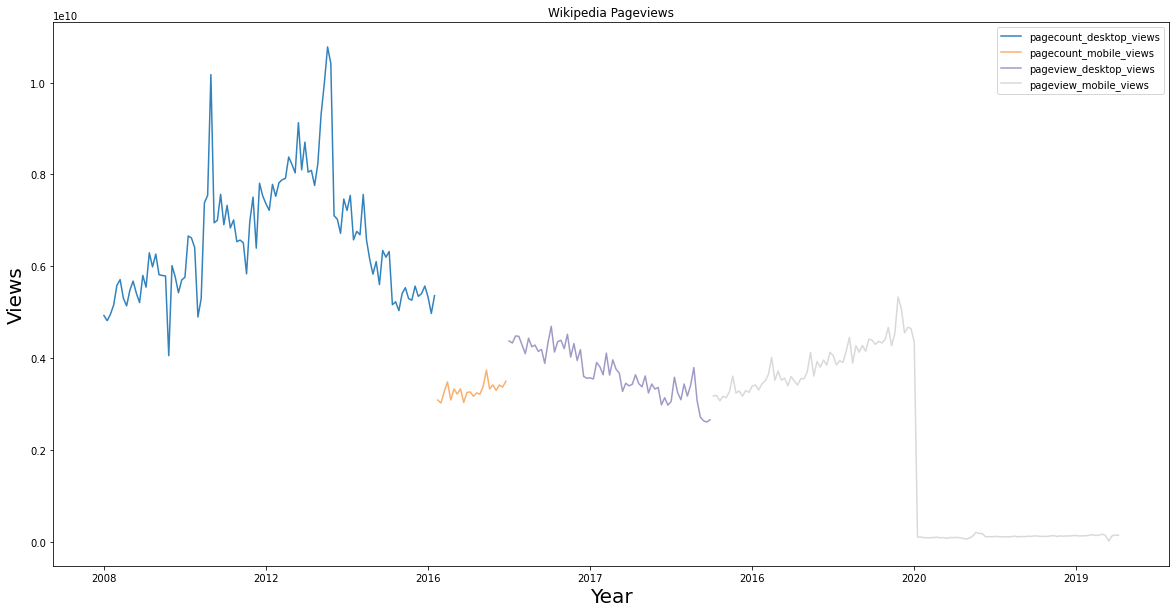

In [91]:
# Plot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = data

ax = df.plot(figsize=(20,10), x='year', colormap='tab20c', title='Wikipedia Pageviews')
ax.set_xlabel("Year", size=20)
ax.set_ylabel("Views", size=20)

***

#### Credits

This exercise is slighty adapted from the course [Human Centered Data Science (Fall 2019)](https://wiki.communitydata.science/Human_Centered_Data_Science_(Fall_2019)) of [Univeristy of Washington](https://www.washington.edu/datasciencemasters/) by [Jonathan T. Morgan](https://wiki.communitydata.science/User:Jtmorgan).

Same as the original inventors, we release the notebooks under the [Creative Commons Attribution license (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/).